In [2]:
from pathlib import Path
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = Path.cwd().parent.joinpath('data', 'raw')

In [27]:
book_ratios = pd.read_csv(DATA_PATH.joinpath('book_ratios.csv'))
all_tickers = pd.read_csv(DATA_PATH.joinpath('market_values.csv'), usecols=['gvkey', 'tic', 'conm'])

missing = book_ratios.loc[book_ratios.TICKER.isna(), ['gvkey', 'TICKER']]
for gvkey in missing.gvkey.unique():
    if len(all_tickers.tic[all_tickers.gvkey==gvkey]):
        book_ratios.loc[book_ratios.gvkey==gvkey, 'TICKER'] = all_tickers.tic[all_tickers.gvkey==gvkey].iloc[0]
book_ratios = book_ratios.dropna(subset=['TICKER'])

In [28]:
book_ratios.head()

,gvkey,permno,adate,qdate,public_date,bm,ptb,TICKER,cusip
0,12825,10026,19990930.0,19990930,20000131,0.781,1.242,JJSF,46603210
1,12825,10026,19990930.0,19991231,20000229,0.759,1.185,JJSF,46603210
2,12825,10026,19990930.0,19991231,20000331,0.759,1.273,JJSF,46603210
3,12825,10026,19990930.0,19991231,20000430,0.759,1.001,JJSF,46603210
4,12825,10026,19990930.0,20000331,20000531,0.786,0.934,JJSF,46603210


In [42]:
def get_bad_data(book_ratios):
    bad_data = list()
    for ticker in book_ratios.TICKER.unique():
        subset = book_ratios[book_ratios.TICKER==ticker]
        if np.isnan(subset.ptb.iloc[-1]):
            subset = subset.iloc[:-1]
        current = 'na' if np.isnan(subset.ptb.iloc[0]) else 'val'
        for v in subset.ptb[1:]:
            if not np.isnan(v):
                current = 'val'
            elif current == 'val' and np.isnan(v):
                try:
                    name = all_tickers[all_tickers.tic==ticker].conm.values[0]
                except IndexError:
                    name = 'UNKNOWN'
                bad_data.append((ticker, name))
                continue
    return Counter(bad_data)

In [44]:
counter = 0
for entry in bad_data_1:
    if entry[1] == 'UNKNOWN':
        counter += 1
counter

27

In [46]:
np.mean(list(bad_data_1.values()))

28.36986301369863

In [43]:
bad_data_1 = get_bad_data(book_ratios)
bad_data_1

Counter({('BEAM', 'BEAM THERAPEUTICS INC'): 1,
         ('MHG', 'UNKNOWN'): 1,
         ('EBIX', 'UNKNOWN'): 6,
         ('DAN', 'DANA INC'): 1,
         ('EK', 'UNKNOWN'): 24,
         ('GM', 'GENERAL MOTORS CO'): 28,
         ('GNC', 'UNKNOWN'): 41,
         ('MYG', 'NETS FTSE CNBC GLOBAL 300'): 13,
         ('RNDY', "ROUNDY'S INC"): 9,
         ('FWM', 'UNKNOWN'): 11,
         ('UST', 'PROSHARES ULTRA 7-10 YR TRES'): 31,
         ('ENR', 'ENERGIZER HOLDINGS INC'): 15,
         ('RRR', 'RED ROCK RESORTS INC'): 26,
         ('CPAA', 'CONYERS PARK II ACQ'): 1,
         ('LW', 'LAMB WESTON HOLDINGS INC'): 27,
         ('GT', 'GOODYEAR TIRE & RUBBER CO'): 21,
         ('GIS', 'GENERAL MILLS INC'): 12,
         ('LO', 'LORILLARD INC'): 97,
         ('KMB', 'KIMBERLY-CLARK CORP'): 24,
         ('CL', 'COLGATE-PALMOLIVE CO'): 48,
         ('BRBR', 'BELLRING BRANDS INC'): 1,
         ('WIN', 'UNKNOWN'): 14,
         ('CPB', 'CAMPBELL SOUP CO'): 12,
         ('F', 'FORD MOTOR CO'): 36,
      

In [8]:
for elem in bad_data_1.items():
    if elem[1] == 1:
        subset = market_values[market_values.tic == elem[0][0]]
        ind = subset[subset.mkvaltq.isna()].index[-1]
        if ind == subset.index[-1]:
            subset.loc[ind, 'mkvaltq'] = subset.loc[ind-1, 'mkvaltq']
        else:
            subset.loc[ind, 'mkvaltq'] = (subset.loc[ind-1, 'mkvaltq'] + subset.loc[ind+1, 'mkvaltq']) / 2
        market_values[market_values.tic == elem[0][0]] = subset

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
get_bad_data(market_values)

Counter({('DG', 'DOLLAR GENERAL CORP'): 10,
         ('KHC', 'KRAFT HEINZ CO'): 10,
         ('NATR', 'NATURES SUNSHINE PRODS INC'): 4,
         ('CCL', 'CARNIVAL CORPORATION & PLC'): 5,
         ('NBEV', 'NEWAGE INC'): 2,
         ('SMPL', 'SIMPLY GOOD FOODS COMPANY'): 5,
         ('PFGC', 'PERFORMANCE FOOD GROUP CO'): 32,
         ('KDP', 'KEURIG DR PEPPER INC'): 10,
         ('LMNR', 'LIMONEIRA CO'): 4,
         ('NHTC', 'NATURAL HEALTH TRENDS CORP'): 3,
         ('TTWO', 'TAKE-TWO INTERACTIVE SFTWR'): 2,
         ('AIPC', 'AMER ITALIAN PASTA CO  -CL A'): 3,
         ('SVM', 'SILVERCORP METALS INC'): 4,
         ('APTV', 'APTIV PLC'): 9,
         ('SEED', 'ORIGIN AGRITECH LTD'): 7,
         ('CZZ', 'COSAN LTD'): 2,
         ('NOMD', 'NOMAD FOODS LTD'): 2})

In [10]:
last_mkt_cap = list()
for tick in market_values.tic.unique():
    subset = market_values[market_values.tic == tick]
    val = subset.mkvaltq.values[-1]
    if not np.isnan(val):
        if val*1_000_000 < 0.2*100_000_000_000:
#             print(f'{tick}: {val*1_000_000:,}')
            last_mkt_cap.append(subset.mkvaltq.values[-1]*1_000_000)

(array([73., 50., 31., 21., 10., 12., 17.,  9., 11.,  7.,  5.,  6.,  5.,
         3.,  1.,  5.,  0.,  3.,  1.,  1.]),
 array([2.14600000e+05, 9.50816010e+08, 1.90141742e+09, 2.85201883e+09,
        3.80262024e+09, 4.75322165e+09, 5.70382306e+09, 6.65442447e+09,
        7.60502588e+09, 8.55562729e+09, 9.50622870e+09, 1.04568301e+10,
        1.14074315e+10, 1.23580329e+10, 1.33086343e+10, 1.42592358e+10,
        1.52098372e+10, 1.61604386e+10, 1.71110400e+10, 1.80616414e+10,
        1.90122428e+10]),
 <a list of 20 Patch objects>)

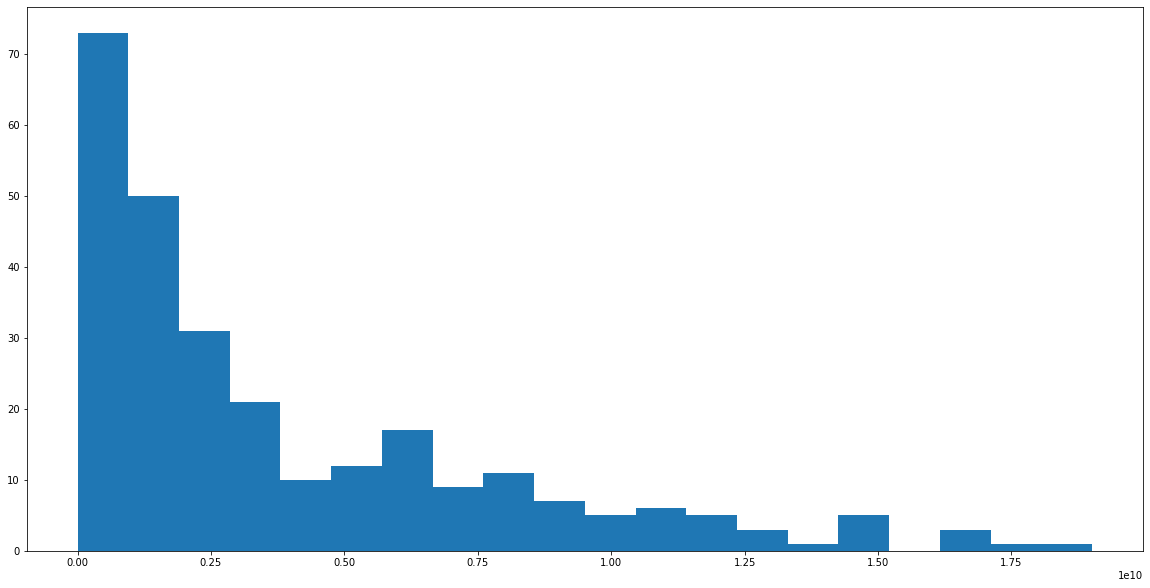

In [11]:
plt.figure(figsize=(20,10))
plt.hist(last_mkt_cap, bins=20)

In [12]:
month_end_prices = pd.read_csv(DATA_PATH.joinpath('month_end_prices.csv'))

In [13]:
returns = {'small': [], 'big': []}
tickers = {'small':[], 'big': []}
caps = {'small':[], 'big':[]}
for tick in tqdm_notebook(market_values.tic.unique()):
    subset = market_values[market_values.tic == tick]
    r = pd.DataFrame()
    inds = month_end_prices[month_end_prices.tic == tick].index
    r = r.append(month_end_prices.loc[inds])
    r['return'] = r.prccm.pct_change()
    if subset.mkvaltq.values[-1] > 20_000:
        returns['big'].append(r['return'].mean())
        tickers['big'].append(tick)
        caps['big'].append(subset.mkvaltq.values[-1])
    else:
        returns['small'].append(r['return'].mean())
        tickers['small'].append(tick)
        caps['small'].append(subset.mkvaltq.values[-1])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/372 [00:00<?, ?it/s]

In [14]:
npsmall = np.array(returns['small'])
npbig = np.array(returns['big'])

In [15]:
np.where(npsmall > 5)

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([297]),)

In [16]:
npsmall = np.delete(npsmall, 297)
del tickers['small'][297]
del returns['small'][297]
del caps['small'][297]

In [17]:
for t in np.where(npsmall > 5)[0]:
    print(tickers['small'][t])
    print(npsmall[t])

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [18]:
np.nanmean(npsmall) - np.nanmean(npbig)

0.007656894662565592

In [19]:
ticks = []
capsize = []
rets = []
for i in range(len(tickers['small'])):
    ticks.append(tickers['small'][i])
    capsize.append(caps['small'][i])
    rets.append(returns['small'][i])

for i in range(len(tickers['big'])):
    ticks.append(tickers['big'][i])
    capsize.append(caps['big'][i])
    rets.append(returns['big'][i])

In [20]:
ticks = np.array(ticks)
capsize = np.array(capsize)
rets = np.array(rets)
rets = np.delete(rets, np.where(np.isnan(capsize))[0])
ticks = np.delete(ticks, np.where(np.isnan(capsize))[0])
capsize = np.delete(capsize, np.where(np.isnan(capsize))[0])


In [21]:
q = []
for i in range(0, 100, 10):
    mask = np.logical_and(capsize > np.percentile(capsize,i), capsize<np.percentile(capsize,i+10))
    rr = rets[mask]
    q.append(np.mean(rr))

<BarContainer object of 10 artists>

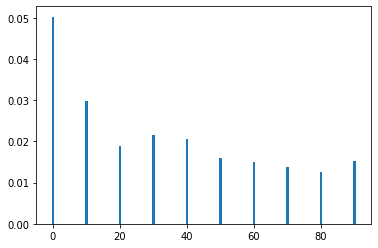

In [22]:
plt.bar(x = range(0,100,10), height = q)